# **TR-04/2020 - Technical report: Descriptive of cardiovascular hospitalizations**


|Technical Report ID  |2020/04|
|--|--|
| Title |Descriptive of cardiovascular hospitalizations|
| Authors | Júlia De Lázari, Paula Dornhofer|
| Creation Date| 2020-12|


## Database description

**input:** hospitalizações_circulatório.csv

The database used for this analysis is the preprocessed database from SSC (Health Secretay of Campinas - Secretaria de Saúde de Campinas). It contains hospitalizations due to cardiovascular ICDs from 2014 to 2018. This dataframe contains 12903 rows and 7 columns (Date, Hour, Patient number, Age, Sex, ICD, Description of ICD).

## Analysis

This report analyse the basic descriptive measures of number of hospitalizations and frequency of hospitalizations per sex, age, ICD, year, month and season.



## **Import libraries**

In [ ]:
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import pylab 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import PercentFormatter


from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


##**Load data**

In [ ]:
#-------------------------------------------------------------------#
#               Load dataframe - cirulatorio (SSC)                  #
#-------------------------------------------------------------------#

df_circ = pd.read_csv('hospitalizações_circulatório.csv')
df_circ = df_circ.drop(columns = 'Unnamed: 0') #drop unneded column
df_circ['Data'] = pd.to_datetime(df_circ['Data']) #transform to datetime format
df_circ = df_circ.sort_values('Data')

##**Descriptive measures**

Get basic descriptive measures of daily number of hospitalizations.

In [ ]:
#create column for daily number of hospitalizations
df_circ['N_hosp'] = np.where(df_circ['CID'].isnull(),0,df_circ.groupby(['Data']).Data.transform('count'))

In [ ]:
summary = pd.DataFrame(round(df_circ['N_hosp'].describe(),2))
summary

,N_hosp
count,12903.00
mean,8.50
std,3.21
min,1.00
25%,6.00
50%,8.00
75%,10.00
max,22.00


## **Distributions**

- frequency of sexes
- frequency of age groups
- frequency of icd
- hospitalizations per year
- hospitalizations per month
- hospitalization per season

In [ ]:
#-------------------------------------------------------------------#
#                         Frequency of sexes                        #
#-------------------------------------------------------------------#

#get the absolute value of sex as 'M' and 'F its percent

sex = pd.DataFrame(df_circ['Sexo'].value_counts())
sex['Percent'] = sex['Sexo']/sex['Sexo'].sum()*100
sex['Percent'] = round(sex['Percent'],2)
sex = sex.rename(columns={'index':'Sex','Sexo':'Count'})
sex.head()

,Count,Percent
M,7152,55.43
F,5751,44.57


**Conclusion:** more man were hospitalized due to cardiovascular ICDs than woman in our dataset.

         Age group  Count  Percent
4       1 - Infant     21     0.16
5        2 - Child      4     0.03
3     3 - Teenager     51     0.40
2  4 - Young adult    609     4.72
1        5 - Adult   5647    43.77
0      6 - Elderly   6571    50.93




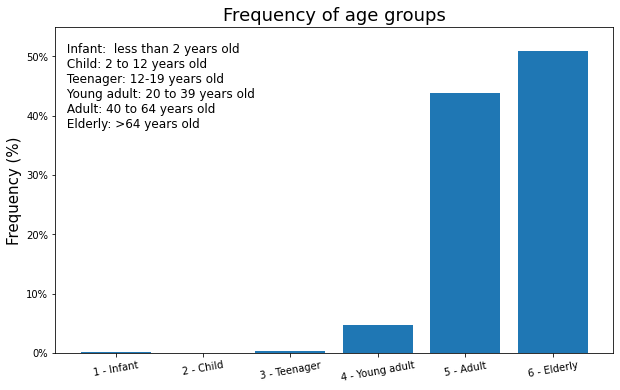

In [ ]:
#-------------------------------------------------------------------#
#                     Frequency of age groups                       #
#-------------------------------------------------------------------#

#caracterize age in age groups
#   infant: <2
#   child: 2-12
#   teenager: 12-19
#   young adult: 20-39
#   adult: 40-64
#   elderly: > 64

df_circ.loc[df_circ['Idade'] < 2.0, 'Age group'] = '1 - Infant'
df_circ.loc[(df_circ['Idade'] >=2.0) & (df_circ['Idade'] <= 12.0), 'Age group'] = '2 - Child'
df_circ.loc[(df_circ['Idade'] >=13.0) & (df_circ['Idade'] <= 19.0), 'Age group'] ='3 - Teenager'
df_circ.loc[(df_circ['Idade'] >=20.0) & (df_circ['Idade'] <= 39.0), 'Age group'] ='4 - Young adult'
df_circ.loc[(df_circ['Idade'] >=40.0) & (df_circ['Idade'] <= 64.0), 'Age group'] ='5 - Adult'
df_circ.loc[df_circ['Idade'] >64.0, 'Age group'] = '6 - Elderly'

#get absolute values and percent
age = pd.DataFrame(df_circ['Age group'].value_counts())
age = age.reset_index()
age = age.sort_values(by=['index'])
age['Percent'] = age['Age group']/age['Age group'].sum()*100
age['Percent'] = round(age['Percent'],2)
age = age.rename(columns={'index':'Age group','Age group':'Count'})
print(age)
print('\n')

#plot
plt.figure(figsize=(10,6))
plt.bar(age['Age group'],age['Percent'])
plt.xlabel('')
plt.ylabel('Frequency (%)',fontsize = 15)
plt.ylim(0,55)
plt.title('Frequency of age groups',fontsize = 18)
plt.text(-0.6,38,' Infant:  less than 2 years old \n Child: 2 to 12 years old \n Teenager: 12-19 years old \n Young adult: 20 to 39 years old \n Adult: 40 to 64 years old\n Elderly: >64 years old', fontsize = 12)
plt.xticks(rotation=10)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** the most affected age group was the elderly (>64 years old), representing more than half of the dataset, followed by adults (40-64 years old).

    ICD  Count  Percent
0   I64   2327    18.03
1  I500   1500    11.63
2  I200   1331    10.32
3  I219   1085     8.41
4  I509    829     6.42
5  I209    630     4.88
6  I739    558     4.32
7  I829    436     3.38
8   I48    426     3.30
9  I442    277     2.15


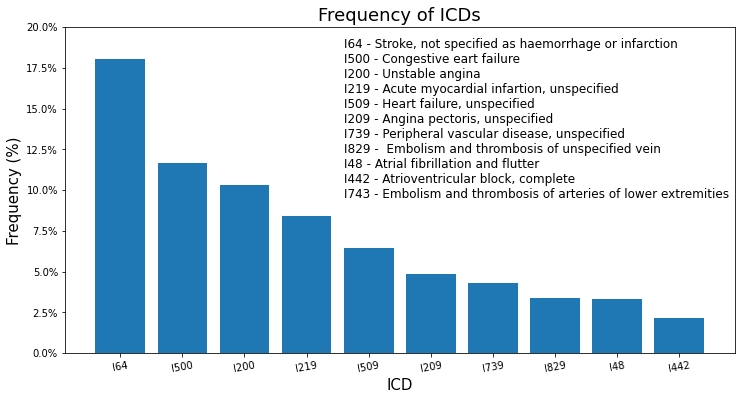

In [ ]:
#-------------------------------------------------------------------#
#          Frequency of ICDs - Specific (3 digits)                  #
#-------------------------------------------------------------------#

#create new dataframe
icd = pd.DataFrame(df_circ['CID'].value_counts())
icd = icd.reset_index()
icd = icd.sort_values(by=['index'])
icd['Percent'] = icd['CID']/icd['CID'].sum()*100
icd['Percent'] = round(icd['Percent'],2)
icd = icd[icd['Percent']>2.0] #get only the relevant percentage
icd = icd.rename(columns={'index':'ICD','CID':'Count'})
icd = icd.sort_values('Percent',ascending=False)
print(icd)

#meaning of each ICD

'''https://www.aapc.com/codes/icd-10-codes-range/I00-I99'''

#plot
plt.figure(figsize=(12,6))
plt.bar(icd['ICD'],icd['Percent'])
plt.xlabel('ICD',fontsize=15)
plt.ylabel('Frequency (%)',fontsize = 15)
plt.ylim(0,20)
plt.title('Frequency of ICDs',fontsize = 18)
plt.xticks(rotation=10)
plt.text(3.6,9.5,'I64 - Stroke, not specified as haemorrhage or infarction \nI500 - Congestive eart failure \nI200 - Unstable angina  \nI219 - Acute myocardial infartion, unspecified \nI509 - Heart failure, unspecified \nI209 - Angina pectoris, unspecified  \nI739 - Peripheral vascular disease, unspecified \nI829 -  Embolism and thrombosis of unspecified vein  \nI48 - Atrial fibrillation and flutter  \nI442 - Atrioventricular block, complete  \nI743 - Embolism and thrombosis of arteries of lower extremities',fontsize=12)   
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** the most comum cardiovascular in our dataset was I64 (strokes) followed by I500 (heart failure) and I200 (unstable angina)

   ICD  Count  Percent
0  I50   2331    18.07
1  I64   2327    18.03
2  I20   2005    15.54
3  I21   1433    11.11
4  I73    635     4.92
5  I82    537     4.16
6  I48    426     3.30
7  I70    393     3.05
8  I44    347     2.69
9  I74    289     2.24


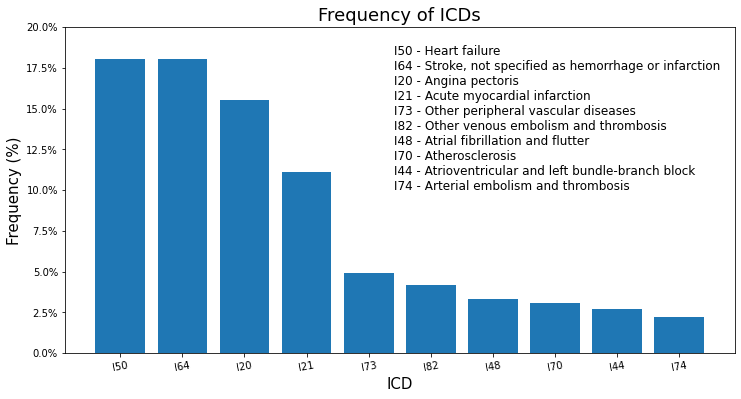

In [ ]:
#-------------------------------------------------------------------#
#         Frequency of ICDs - General (first 2 digits)              #
#-------------------------------------------------------------------#

#create dataframe for icd
icd = pd.DataFrame(df_circ['CID'].astype(str).str[0:3].value_counts())
icd = icd.reset_index()
icd = icd.sort_values(by=['index'])
icd['Percent'] = icd['CID']/icd['CID'].sum()*100
icd['Percent'] = round(icd['Percent'],2)
icd = icd[icd['Percent']>2.0] #get only the relevant percentage
icd = icd.rename(columns={'index':'ICD','CID':'Count'})
icd = icd.sort_values('Percent',ascending=False)
print(icd)

#meaning of each ICD

'''https://icd.who.int/browse10/2016/en#/I20-I25'''

#plot
plt.figure(figsize=(12,6))
plt.bar(icd['ICD'],icd['Percent'])
plt.xlabel('ICD',fontsize=15)
plt.ylabel('Frequency (%)',fontsize = 15)
plt.ylim(0,20)
plt.title('Frequency of ICDs',fontsize = 18)
plt.xticks(rotation=10)
plt.text(4.4,10, 'I50 - Heart failure \nI64 - Stroke, not specified as hemorrhage or infarction \nI20 - Angina pectoris \nI21 - Acute myocardial infarction  \nI73 - Other peripheral vascular diseases  \nI82 - Other venous embolism and thrombosis \nI48 - Atrial fibrillation and flutter \nI70 - Atherosclerosis \nI44 - Atrioventricular and left bundle-branch block \nI74 - Arterial embolism and thrombosis ' ,fontsize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** when grouping by a more general ICD the most common in the dataframe are I50 (Heart failure) and I64 (Stroke).

   Year  Count
4  2014   2281
2  2015   2597
0  2016   2762
1  2017   2720
3  2018   2543




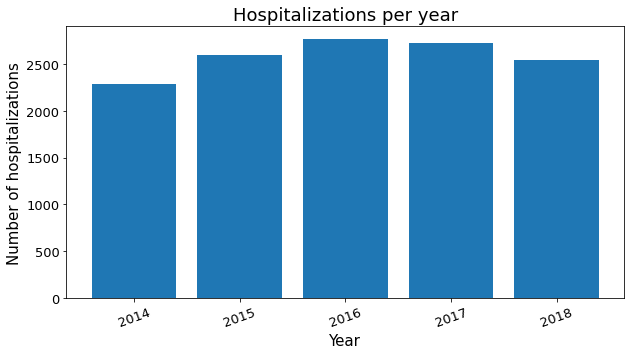

In [ ]:
#-------------------------------------------------------------------#
#                    Hospitalizations per year                      #
#-------------------------------------------------------------------#

#create dataframe for year
year = pd.DataFrame(df_circ['Data'].dt.strftime('%Y').value_counts())
year = year.reset_index()
year = year.sort_values(by=['index'])
year = year.rename(columns={'index':'Year','Data':'Count'})
print(year)
print('\n')

#plot
plt.figure(figsize=(10,5))
plt.bar(year['Year'],year['Count'])
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Number of hospitalizations',fontsize = 15)
plt.title('Hospitalizations per year',fontsize=18)
plt.xticks(fontsize = 13, rotation = 20)
plt.yticks(fontsize = 13)
plt.show()

   Month  Count  Percent
11    12    921     7.14
10    10    922     7.15
9     11   1005     7.79
8     02   1042     8.08
7     04   1047     8.11
6     03   1060     8.22
5     01   1067     8.27
4     05   1125     8.72
3     09   1128     8.74
2     08   1161     9.00
1     06   1199     9.29
0     07   1226     9.50




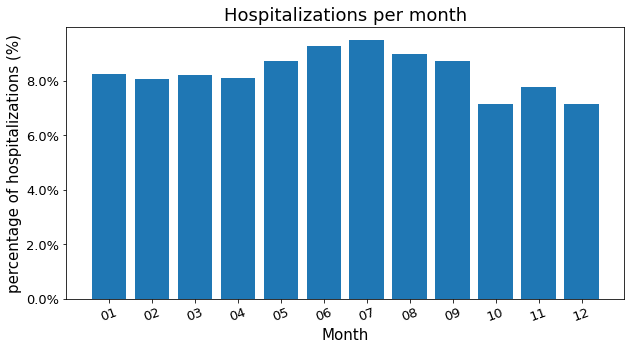

In [ ]:
#-------------------------------------------------------------------#
#                   Hospitalizations per month                      #
#-------------------------------------------------------------------#

month = pd.DataFrame(df_circ['Data'].dt.strftime('%m').value_counts())
month = month.reset_index()
month = month.sort_values(by=['index'])
month['Percent'] = month['Data']/month['Data'].sum()*100
month['Percent'] = round(month['Percent'],2)
month = month.rename(columns={'index':'Month','Data':'Count'})
print(month.sort_values('Percent'))
print('\n')

#plot
plt.figure(figsize = (10,5))
plt.bar(month['Month'],month['Percent'])
plt.xlabel('Month',fontsize = 15)
plt.ylabel('percentage of hospitalizations (%)',fontsize = 15)
plt.title('Hospitalizations per month',fontsize=18)
plt.xticks(fontsize = 13, rotation = 20)
plt.yticks(fontsize = 13)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** the months with more hospitalizations were July and June. 

The months with less hospitalizations were December and October.

   Season  Count  Percent
1  Autumn   3232    25.05
2  Spring   3055    23.68
3  Summer   3030    23.48
0  Winter   3586    27.79




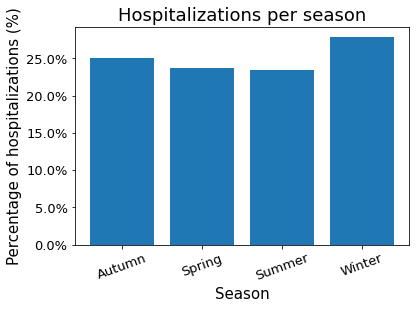

In [ ]:
#-------------------------------------------------------------------#
#                    Hospitalizations per season                    #
#-------------------------------------------------------------------#

# create a column for season

summer = [12,1,2]
autumn = [3,4,5]
winter = [6,7,8]
spring = [9,10,11]

df_circ['Month'] = df_circ['Data'].dt.strftime('%m').astype(int)
df_circ.loc[df_circ['Month'].isin(summer), 'Season'] = 'Summer'
df_circ.loc[df_circ['Month'].isin(autumn), 'Season'] = 'Autumn'
df_circ.loc[df_circ['Month'].isin(winter), 'Season'] = 'Winter'
df_circ.loc[df_circ['Month'].isin(spring), 'Season'] = 'Spring'

season = pd.DataFrame(df_circ['Season'].value_counts())
season = season.reset_index()
season = season.sort_values(by=['index'])
season['Percent'] = season['Season']/season['Season'].sum()*100
season['Percent'] = round(season['Percent'],2)
season = season.rename(columns={'index':'Season','Season':'Count'})
print(season)
print('\n')

#plot
plt.bar(season['Season'],season['Percent'])
plt.xlabel('Season',fontsize = 15)
plt.ylabel('Percentage of hospitalizations (%)',fontsize = 15)
plt.title('Hospitalizations per season',fontsize=18)
plt.xticks(np.arange(0,4),fontsize = 13, rotation = 20)
plt.yticks(fontsize = 13)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conlusion:** the season with more hospitalizations was Winter, and the season with less hospitalizations was Summer.